<div style="text-align: right"> Sady Guzman <br> Programacion Avanzada</div>

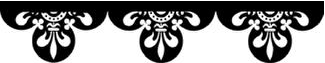

# Actividad 1: Trabajando con Bags 

* En esta actividad de crea un Dask Bag a partir de 3 diccionarios, Cada diccionario representa una persona, Incluyendo informacion como: Nombre, Sexo, Edad, Ocupacion, Residencia. <br> <br> Con estos datos se hacen operaciones de mapeo filtrado y agergacion.

# 1.- Crear Dask Bag a Partir de Lista de Diccionarios

### Crea diccionarios

In [1]:
import dask.bag as db

diccionario1 = {
    'nombre': 'Stephen King',
    'sexo': 'masculino',
    'edad': 76,
    'ocupacion': 'escritor',
    'residencia': 'USA'
}

diccionario2 = {
    'nombre': 'Sady',
    'sexo': 'masculino',
    'edad':  21,
    'ocupacion': 'estudiante',
    'residencia': 'coquimbo'
}

diccionario3 = {
    'nombre': 'Martin',
    'sexo': 'masculino',
    'edad': 30,
    'ocupacion': 'estudiante',
    'residencia': 'coquimbo'
}

diccionario4 = {
    'nombre': 'Monica',
    'sexo': 'femenino',
    'edad': 54,
    'ocupacion': 'ing comercial',
    'residencia': 'metropolitana'
}

### Combina los diccionarios

In [2]:
dict_comb_items = [diccionario1, diccionario2, diccionario3, diccionario4]

### Transforma los diccionarios en una Bag

In [3]:
dic_bag = db.from_sequence(dict_comb_items)

* * * 
# 2.- Aplicando Transformaciones
<br>

## Filter: Edad sobre x

In [17]:
mostrar = dic_bag.filter(lambda item: item['edad'] > 30).pluck('nombre').compute() 

print("Personas sobre 30 años:", mostrar)

Personas sobre 30 años: ['Stephen King', 'Monica']


## Map: Ocupaciones

In [ ]:
mostrar = dic_bag.pluck('ocupacion').compute()

print("Ocupaciones de las personas en el Bag antes de usar map:\n", mostrar)

### Aplica .map()

In [ ]:
mostrar = dic_bag.map(lambda item: {k: 'Chef' if k == 'ocupacion' else v for k, v in item.items()}).pluck("ocupacion").compute()

### Resultado luego de la transformacion

In [16]:
print("\n\nOcupaciones de las personas en el Bag luego de usar map: \n", mostrar)

Ocupaciones de las personas en el Bag antes de usar map:
 ['escritor', 'estudiante', 'estudiante', 'ing comercial']


Ocupaciones de las personas en el Bag luego de usar map: 
 ['Chef', 'Chef', 'Chef', 'Chef']


* * *

## Count y Max: Genero, Residencia, Requisito Edad, Edad Superior 

### Elementos en el Bag

In [26]:
cant_personas = dic_bag.count().compute()

print("Cantidad de personas en BAG:", cant_personas)

Cantidad de personas en BAG: 4


### Elementos Genero: Femenino

In [25]:
femenino = dic_bag.filter(lambda item: item["sexo"] == "femenino").count().compute()

print("\n\nCantidad de personas con genero Femenino:", femenino)



Cantidad de personas con genero Femenino: 1


### Elementos sobre un valor

In [27]:
sobre_25 = dic_bag.filter(lambda item: item['edad'] > 25).count().compute()

print("\n\nCantidad de personas con edad sobre 25:", sobre_25)



Cantidad de personas con edad sobre 25: 3


### Elemento con maximo valor especfico

In [28]:
mayor = dic_bag.pluck("edad").max().compute()

print("\n\nLa edad de la persona con la edad mas alta es:", mayor)



La edad de la persona con la edad mas alta es: 76


# 3.- Explorar Estructura de Bag

In [70]:
dic_bag.compute()

[{'nombre': 'Stephen King',
  'sexo': 'masculino',
  'edad': 76,
  'ocupacion': 'escritor',
  'residencia': 'USA'},
 {'nombre': 'Sady',
  'sexo': 'masculino',
  'edad': 21,
  'ocupacion': 'estudiante',
  'residencia': 'coquimbo'},
 {'nombre': 'Martin',
  'sexo': 'masculino',
  'edad': 30,
  'ocupacion': 'estudiante',
  'residencia': 'coquimbo'},
 {'nombre': 'Monica',
  'sexo': 'femenino',
  'edad': 54,
  'ocupacion': 'ing comercial',
  'residencia': 'metropolitana'}]

* * *

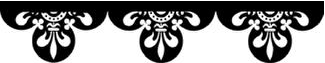

# Actividad 2
## Manipulación de DataFrames con Dask

* Para esta actividad: <br>
se van a usar datasets de los shows de los servicios de streaming Netflix y HBO max, sobre los cuales se van a aplicar transformaciones de filtrado y agregacion <br><br>

* Ambos DataSets contienen los campos: <br> id, title, show_type, description, release_year, age_certification, runtime, genres, production_countries, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score.<br> <br>

* Volumen: La cantidad de datos que se cargaron fueron

>Dataset de netflix contiene: 5850 filas entre shows y peliculas 

>Dataset de HBO     contiene: 3294 filas entre shows y peliculas

# 1.- Cargar un Conjunto de datos en formato .CSV

### Importar y Mostrar Ambos archivos .csv

Al nombrar ambos archivos con la misma estructura, Se puede aprovechar la funcion de busqueda de Windows para usar '*' como comodin y asi unir ambos datasets en un solo dataframe con una sola instruccion.

In [30]:
import dask.dataframe as dd

df_contenido = dd.read_csv('*_titles.csv') # Carga ambos archivos .csv en una sola instruccion y crea DataFrame

### Mostrar los primeros 10

In [183]:
df_contenido.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8
5,tm156463,Gone with the Wind,MOVIE,The spoiled daughter of a well-to-do plantatio...,1939,G,233,"['war', 'romance', 'drama', 'history']",['US'],NaN,tt0031381,8.2,309856.0,24.092,8.0
6,ts225761,Tom and Jerry,SHOW,Tom and Jerry is an American animated franchis...,1940,NaN,8,"['animation', 'comedy', 'family', 'action']",['US'],16.0,tt12158994,7.7,853.0,1.400,10.0
7,tm5094,The Treasure of the Sierra Madre,MOVIE,"Fred C. Dobbs and Bob Curtin, both down on the...",1948,NaN,126,"['western', 'drama']",['US'],NaN,tt0040897,8.2,122971.0,14.006,8.0
8,tm54459,The Asphalt Jungle,MOVIE,"Recently paroled from prison, legendary burgla...",1950,NaN,112,"['drama', 'thriller', 'crime']",['US'],NaN,tt0042208,7.8,26557.0,9.809,7.5
9,tm81960,The Philadelphia Story,MOVIE,When a rich woman's ex-husband and a tabloid-t...,1940,NaN,113,"['romance', 'comedy']",['US'],NaN,tt0032904,7.9,68337.0,11.587,7.7


* * *
# 2.- Realizar Operaciones de Manipulacion de Datos

## Filtrar contenido

*  10 Peliculas y shows estrenados en 2021

In [33]:
contenido_filtrado = df_contenido[df_contenido['release_year'] == 2021]

contenido_filtrado.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2981,tm305113,Dune,MOVIE,"Paul Atreides, a brilliant and gifted young ma...",2021,PG-13,155,"['scifi', 'action', 'drama']",['US'],NaN,tt1160419,8.1,562797.0,301.888,7.9
2984,ts215918,Made For Love,SHOW,Thirty-something Hazel Green tries to escape a...,2021,TV-MA,29,"['scifi', 'thriller', 'comedy', 'drama']",['US'],2.0,tt7808566,6.8,8899.0,40.003,7.0
2985,ts287233,Hacks,SHOW,Explore a dark mentorship that forms between D...,2021,TV-MA,30,"['comedy', 'drama']",['US'],2.0,tt11815682,8.2,19452.0,19.817,7.1
2988,tm1047284,Drive My Car,MOVIE,"Yusuke Kafuku, a stage actor and director, sti...",2021,NaN,179,['drama'],['JP'],NaN,tt14039582,7.6,35861.0,28.492,7.5
2989,tm855362,Nightmare Alley,MOVIE,An ambitious carnival man with a talent for ma...,2021,R,150,"['thriller', 'action', 'fantasy', 'horror', 'c...",['US'],NaN,tt7740496,7.1,119740.0,342.803,7.1
2990,tm460711,Free Guy,MOVIE,A bank teller called Guy realizes he is a back...,2021,PG-13,115,"['scifi', 'comedy', 'fantasy', 'action']",['US'],NaN,tt6264654,7.1,335518.0,398.516,7.7
2991,tm827124,The Matrix Resurrections,MOVIE,"Plagued by strange memories, Neo's life takes ...",2021,R,148,"['scifi', 'action']",['US'],NaN,tt10838180,5.7,221846.0,641.541,6.7
2992,tm860276,Nobody,MOVIE,"Hutch Mansell, a suburban dad, overlooked husb...",2021,R,92,"['thriller', 'action', 'crime', 'drama']",['US'],NaN,tt7888964,7.4,223836.0,144.914,8.2
2993,ts216284,Station Eleven,SHOW,A post apocalyptic saga spanning multiple time...,2021,TV-MA,51,"['fantasy', 'scifi', 'thriller', 'drama']",['US'],1.0,tt10574236,7.6,20877.0,26.659,6.9
2994,tm429301,The French Dispatch,MOVIE,The quirky staff of an American magazine based...,2021,R,103,"['romance', 'drama', 'documentation', 'comedy']","['DE', 'US']",NaN,tt8847712,7.3,81326.0,41.553,7.2


* *  *

# 3.- Calcular Estadísticas en Columas Numericas

## GroupBy.

* Se agrupan los datos por la columna ***IMDb_score*** (Internet Movie DataBase). <br> Luego se aplica una gregacion '**mean()**' para obtener la calificacion promedio de los shows y peliculas.

In [224]:
promedio_columna = df_contenido['imdb_score'].describe().loc['mean'].compute()

print(promedio_columna)

mean    6.642364
Name: imdb_score, dtype: float64


### Otro ejemplo es obtener el año en que se estrenaron la mayor cantidad de peliculas y shows


In [38]:
mas_estrenos = df_contenido['release_year'].value_counts().idxmax().compute()

print("El año de estreno mas comun en las bibliotecas de streamming de Netflix y HBO en el momento que se recolectaron los datos fue: ",mas_estrenos)

El año de estreno mas comun en las bibliotecas de streamming de Netflix y HBO en el momento que se recolectaron los datos fue:  2020


### Si no se limita el output de '.describe()' se muestran mas estadisticas interesantes sobre la calificacion de las peliculas y shows

In [218]:
estadisticas = df_contenido['imdb_score'].describe().compute()

print(estadisticas)

count    8290.000000
mean        6.642364
std         1.142142
min         1.500000
25%         6.300000
50%         7.000000
75%         7.600000
max         9.600000
Name: imdb_score, dtype: float64


* * *

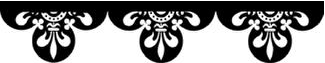

# Actividad 3: Trabajo con Arrays en Dask

* Los datos con los que se va a trabajar en esta actividad son generados aleatoriamente y no representan ningun tipo de informacion real.

* Se generan 1 vector y 2 matrices con valores aleatorios. <br> <br> 
    > Sobre el arreglo tipo Vector se aplica una operacion de multiplicacion, acompañada de visualizacion del efecto que tuvo sobre el arreglo <br> <br>
    > Con los 2 arreglos de matrices se realiza una operacion de suma.

# 1.- Crear Array
* Se crean todos los arrays que se van a usar y se llenan con datos aleatorios. <br>
*  Array de largo 5, rango 1 ~ 100.<br>
* Grids de dimensiones 2 x 2. Rango (-10 , +50)<br>

In [65]:
import matplotlib.pyplot as plt
import dask.array as da
import numpy as np


arr1 = np.random.randint(1, 100, size=5)
grid1 = np.random.randint(-10, 50, size=(2,2))
grid2 = np.random.randint(-10, 50, size=(2,2))

### Convierte a Dask Array

In [75]:
da_arr = da.from_array(arr1)
da_grid1 = da.from_array(grid1, chunks=(2, 2))
da_grid2 = da.from_array(grid2, chunks=(2, 2))

* * *

# 2.- Multiplicacion y Visualizacion de Arreglo Vector

### Operacion y Visualizacion
Como operacion arbitraria se multiplica por 2

ARRAY antes de multiplicacion:  [10 27 61 18 66]


ARRAY despues de multiplicacion:  [ 20  54 122  36 132]


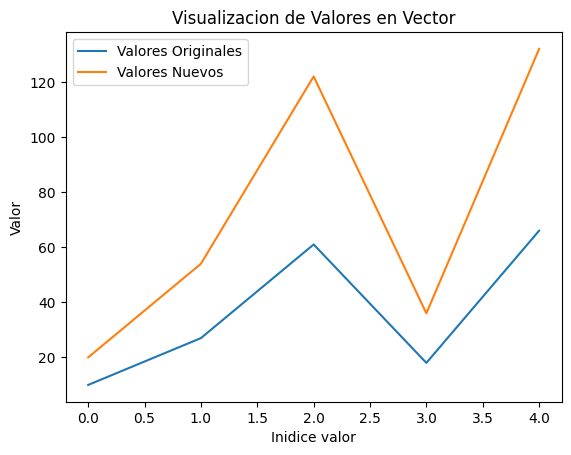

In [78]:
arr_multiplicado = da_arr * 2

backup_valores = da_arr.compute()
print("ARRAY antes de multiplicacion: ", backup_valores)

resultado = arr_multiplicado.compute()
print("\n\nARRAY despues de multiplicacion: ", resultado)


# <-------------------------- PLOT ----------------------->
plt.plot(backup_valores, label = "Valores Originales")
plt.plot(resultado, label = "Valores Nuevos")

plt.title('Visualizacion de Valores en Vector')
plt.xlabel('Inidice valor')
plt.ylabel('Valor')
plt.legend()

plt.show()

# 2,1.- Operacion Matricial: Suma

### Visualiza Matrices

In [76]:
# MUESTRA GRID1
mostrar_grid1 = da_grid1.compute()
print("Valores MATRIZ 1: \n\n", mostrar_grid1, "\n\n")

# MUESTRA GRID2
mostrar_grid2 = da_grid2.compute()
print("Valores MATRIZ 2: \n\n", mostrar_grid2, "\n\n")

Valores MATRIZ 1: 

 [[24 34]
 [ 5 41]] 


Valores MATRIZ 2: 

 [[27 47]
 [ 6 45]] 




### Operacion

In [77]:
# OPERACION CON MATRICES.
print("Resultado de suma de matrices:")

grid_total = da_grid1 + da_grid2

resultado_total = grid_total.compute()

print(resultado_total)

Resultado de suma de matrices:
[[51 81]
 [11 86]]


# 2,3.- Operaciones Estadisticas

### Desviacion Estandar de un array

* Se puede calcular de manera muy simple usando una funcion de Dask. <br>
Se va a usar la funcion <b>.std()</b> <br><br>


Usando mismo arreglo vector del primer ejemplo:

In [80]:
da_arr = da.from_array(arr1)

desv = da.std(da_arr)

print("Desviacion Estandar del arreglo: ", desv.compute())

Desviacion Estandar del arreglo:  22.826300620118012


* * *

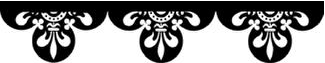

# Actividad 4: Integración de Estructuras de Datos de Dask

* Para esta actividad: Se va a cargar la informacion de los Shows y Peliculas de Netflix desde un archivo <b>.csv</b> a un Dask DataFrame. <br><br>

* E; Dask DataFrame resultante se va a agrupar y filtrar por calificacion para transformar estos datos en un Dask Array. <br><br>

* El Dask Array resultante se va a usar para representar de manera grafica la calificacion de los Shows y Peliculas, Para poder comunicar mas facilmente la informacion.

* Finalmente, Luego de visualizar la informacion original, Se va a hacer una operacion estadistica sobre los datos usando un Dask Bag para comparar la grafica de los datos originales con los datos modificados.

# Se carga informacion en Dask DataFrame

In [81]:
import dask.dataframe as dd
import dask.array as da
import matplotlib.pyplot as plt
import dask.bag as db

# Load the CSV file into a Dask dataframe
df = dd.read_csv('netflix_titles.csv')

### Se agrupa por la columna IMDB_SCORE y se transforma a un DataArray

In [94]:
datos_agrupados = df['imdb_score']

dask_array = da.asarray(datos_agrupados.to_dask_array(lengths=True), chunks=1000)

### Volumen de datos

In [101]:
# Cuenta volumen de datos
resultado = datos_agrupados.compute()
print("Se esta trabajando con un volumen de: ",datos_agrupados.count().compute(), "Datos")

Se esta trabajando con un volumen de:  5368 Datos


### Instrucciones de Ploteo con MathPlotLib de datos originales

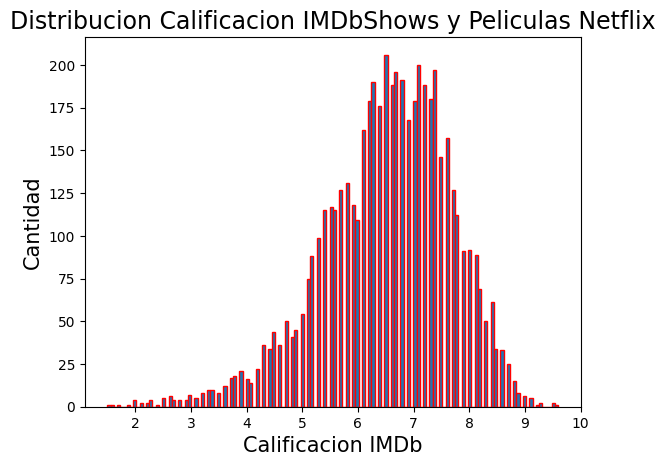

In [103]:
plt.hist(resultado, bins=140, edgecolor='red')

plt.title('Distribucion Calificacion IMDbShows y Peliculas Netflix', size=17)

plt.xlabel("Calificacion IMDb", size=15)
plt.ylabel("Cantidad", size=15)

plt.show()

### Desviacion Estandar

In [120]:
resultado = resultado.dropna()
desv = da.std(resultado)

print("Desviacion Estandar del arreglo: ", desv.compute())

Desviacion Estandar del arreglo:  1.1637178991020456


### Operacion: Disminuye 9% las clasificacion

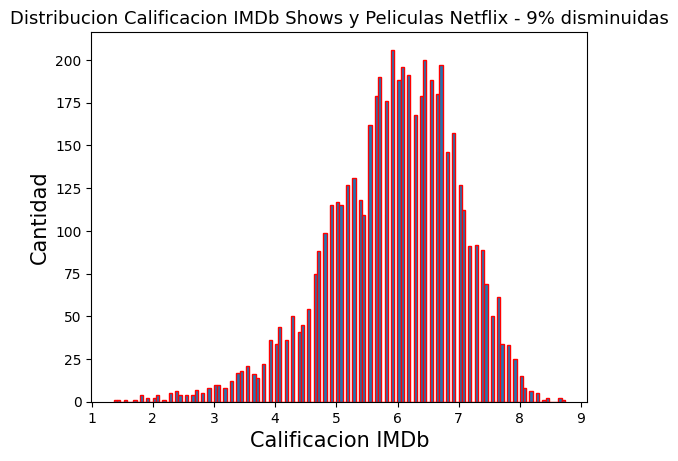

In [118]:
resultado_mod = resultado + (resultado * -0.09)

cali_bag = db.from_sequence(resultado_mod)


plt.hist(resultado_mod, bins=140, edgecolor='red')

plt.title('Distribucion Calificacion IMDb Shows y Peliculas Netflix - 9% disminuidas', size=13)

plt.xlabel("Calificacion IMDb", size=15)
plt.ylabel("Cantidad", size=15)

plt.show()

### Desviacion Estandar de Calificaciones Alteradas

In [119]:
resultado_mod = resultado_mod.dropna()
desv = da.std(resultado_mod)

print("Desviacion Estandar del arreglo: ", desv.compute())

Desviacion Estandar del arreglo:  1.0589832881828616


* * *

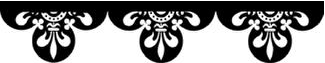

# Actividad 5: Trabajo con Chunks en Dask

* Objetivo principal: Comparar performance con y sin chunks. <br><br>

* Cargar CSV grande, hacer una operacion, dividir en particiones usando .repartitions() y volver a hacer la operacion y comparar el tiempo requerido <br><br>


* Finalmente: Se muestra otro metodo de cargar usando chunks, Esto es mas eficiente ya que se carga directamente en chunks en vez de primero cargar completo el DataSet y luego repartirlo en particiones. Tambien se puede filtrar las columnas que son relevantes para la tarea que se necesita completar.

* * *

* DataSet: Se va a usar un dataset de reviews de libros vendidos en amazon. <br> fuente: https://www.kaggle.com/ 

 ---> Descripcion del data set por el Autor *@MOHAMED BEKHEET*  <br>
> The first file reviews file contain feedback about **3M user on 212404 unique books** the data set  is part of the Amazon review Dataset it contains product reviews and metadata from Amazon,including 142.8 million reviews spanning May 1996 - July 2014. 

<br><br>

* Nota: En este dataset hay algunos datos que se encuentran vacios ya que tienen varios años de antiguedad y no se pudo almacenar la informacion. Estos datos faltantes se ignoran en las operaciones

* **

## Cargar los datos del archivo CSV hacia un PandaDataFrame y se pasa a un DaskDataFrame

In [1]:
import pandas as pd
import dask.dataframe as dd

datos_libros = pd.read_csv('Books_rating.csv')
datos_df = dd.from_pandas(datos_libros, chunksize=1000)

print("Carga Completa.")

Carga Completa.


## repartition()

Para decidir el tamano de los chunks es necesario considerar principalmente: Recursos del sistema, Tamano DataFrame, Tarea a realizar

In [3]:
datos_repartidos = datos_df.repartition(partition_size=1000)
print("Reparticion completa.")

Reparticion completa.


### Cuantos chunks se usaron?

In [40]:
cant_chunks = datos_repartidos.npartitions
print("Se usaron ", cant_chunks ,"chunks.")

Se usaron  41 chunks.


### Visualizando las particiones

In [ ]:
for i in range(datos_repartidos.npartitions):
    print(datos_repartidos.partitions[i].head())

Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
           Id                           Title  Price        User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN  AVCGYZL8FQQTD   

             profileName review/helpfulness  review/score  review/time  \
0  Jim of Oz "jim-of-oz"                7/7           4.0    940636800   

                           review/summary  \
0  Nice collection of Julie Strain images   

                                         review/text  
0  This is only for Julie Strain fans. It's a col...  
           Id                     Title  Price         User_id    profileName  \
1  0826414346  Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R  Kevin Killian   

  review/helpfulness  review/score  review/time     review/summary  \
1              10/10           5.0   1095724800  Really Enjoyed It   

                                         review/tex

Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
            Id                          Title  Price        User_id  \
16  0595344550  Whispers of the Wicked Saints  10.95  AUR0VA5H0C66C   

                         profileName review/helpfulness  review/score  \
16  LoveToRead "Actually Read Books"                1/2           1.0   

    review/time review/summary  \
16   1119225600   Buyer beware   

                                          review/text  
16  This is a self-published book, and if you want...  
            Id                          Title  Price         User_id  \
17  0595344550  Whispers of the Wicked Saints  10.95  A1YLDZ3VHR6QPZ   

   profileName review/helpfulness  review/score  review/time  \
17       Clara                2/4           5.0   1115942400   

         review/summary                                        review/text  
17  Fall on your knee's  W

            Id                          Title  Price         User_id  \
33  0595344550  Whispers of the Wicked Saints  10.95  A29I6N5F8P386Y   

    profileName review/helpfulness  review/score  review/time  \
33  J. serratos                0/0           5.0   1111017600   

                         review/summary  \
33  The best book I've read in years !!   

                                          review/text  
33  This is a wonderful book that will keep you gu...  
            Id                          Title  Price         User_id  \
34  0595344550  Whispers of the Wicked Saints  10.95  A2ABV8FXF88O9P   

   profileName review/helpfulness  review/score  review/time  \
34    Victoria                1/5           4.0   1116892800   

                  review/summary  \
34  Wonderful, wonderful book !!   

                                          review/text  
34  Just as predicted the first chapter of the boo...  
            Id                          Title  Price         User_

            Id                                              Title  Price  \
50  0802841899  The Church of Christ: A Biblical Ecclesiology ...  25.97   

           User_id     profileName review/helpfulness  review/score  \
50  A2H2LORTA5EZY2  Edward E. Howe                3/5           4.0   

    review/time  review/summary  \
50   1266192000  Christ is Lord   

                                          review/text  
50  This is a very useful and thorough text book. ...  
            Id                       Title  Price         User_id profileName  \
51  B0007FIF28  The Overbury affair (Avon)    NaN  A2GERYVE64DIPL     lisamac   

   review/helpfulness  review/score  review/time review/summary  \
51                0/0           3.0   1313366400       Overbury   

                                          review/text  
51  Full of intrigue and a good overview of the co...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time

            Id                        Title  Price         User_id  \
67  0918973031  Dramatica for Screenwriters  17.95  A2KSXSRTMD3ZJ4   

                profileName review/helpfulness  review/score  review/time  \
67  Alicia Butcher Ehrhardt                4/6           5.0   1143504000   

                               review/summary  \
67  Good structure makes good bones for story   

                                          review/text  
67  Beauty is in the bones. This book gives your s...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
            Id                        Title  Price        User_id  \
68  0918973031  Dramatica for Screenwriters  17.95  A9MBRG3MYS472   

       profileName review/helpfulness  review/score  review/time  \
68  joanne flowers                0/0           5.0   1360972800   

   review/summary                                        review/t

            Id                                              Title  Price  \
83  0974289108  The Ultimate Guide to Law School Admission: In...  14.95   

          User_id    profileName review/helpfulness  review/score  \
83  A79QZ7YQFIXG6  Adam Glickman                5/6           5.0   

    review/time                              review/summary  \
83   1129075200  Everything my advisor SHOULD have told me!   

                                          review/text  
83  My advisor never asked any of the right questi...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
            Id                                              Title  Price  \
84  0974289108  The Ultimate Guide to Law School Admission: In...  14.95   

   User_id profileName review/helpfulness  review/score  review/time  \
84     NaN         NaN               9/12           5.0   1066176000   

            review/

            Id             Title  Price        User_id profileName  \
99  B000NKGYMK  Alaska Sourdough    NaN  A7VSVB6Z0JHOV  C.J. Whale   

   review/helpfulness  review/score  review/time  \
99                1/1           2.0   1349654400   

                      review/summary  \
99  Imprecise Recipes Make Bad Bread   

                                          review/text  
99  It's quaint, I'll give it that. The handwritte...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id             Title  Price         User_id profileName  \
100  B000NKGYMK  Alaska Sourdough    NaN  A1VXDNO64WERDD    c.arthur   

    review/helpfulness  review/score  review/time  \
100                0/0           5.0   1359590400   

                     review/summary  \
100  cant cook sourdough without it   

                                           review/text  
100  Bought this in 1

             Id             Title  Price         User_id  \
117  B000NKGYMK  Alaska Sourdough    NaN  A3TIBVQGLAB2AM   

              profileName review/helpfulness  review/score  review/time  \
117  William H. Akins Jr.                1/2           5.0   1243296000   

       review/summary                                        review/text  
117  Alaska Sourdough  I received this book as a BD gift... I love it...  
             Id                                              Title  Price  \
118  0195178548  The Oxford Handbook of Free Will (Oxford Handb...    NaN   

            User_id      profileName review/helpfulness  review/score  \
118  A1MEHQSDHEI882  Michael McKenna              26/27           5.0   

     review/time                                    review/summary  \
118   1105574400  Robert Kane's *The Oxford Handbook on Free Will*   

                                           review/text  
118  Do you want to brought up to speed on the stat...  
             Id      

             Id                              Title  Price         User_id  \
133  0789480662  Eyewitness Travel Guide to Europe    NaN  A17MDEMPSPTH3Q   

                      profileName review/helpfulness  review/score  \
133  Melissa B. Derecola "wasadz"                1/1           5.0   

     review/time     review/summary  \
133   1172448000  Good Overall Idea   

                                           review/text  
133  I really like the eyewitness guides, I have se...  
             Id                              Title  Price         User_id  \
134  0789480662  Eyewitness Travel Guide to Europe    NaN  A3MUP153I830YU   

                         profileName review/helpfulness  review/score  \
134  Amazon Customer "7864845763574"                2/3           4.0   

     review/time                                     review/summary  \
134   1236988800  nice eye candy, but not as handy as the other ...   

                                           review/text  
134  The 

             Id                 Title  Price        User_id  profileName  \
149  B0000CJHIO  Hunting The Hard Way    NaN  A9WHN5LL0T8FY  Kai G Davis   

    review/helpfulness  review/score  review/time  \
149              14/16           5.0    988588800   

                            review/summary  \
149  GREAT GIFT FOR ANY TRADITIONAL ARCHER   

                                           review/text  
149  I received my book on a friday and read it cov...  
             Id                 Title  Price         User_id    profileName  \
150  B0000CJHIO  Hunting The Hard Way    NaN  A15A5BMZ0K8ZYM  Dean M. Trone   

    review/helpfulness  review/score  review/time        review/summary  \
150                2/2           5.0   1204588800  hunting the hard way   

                                           review/text  
150  exellent book for the beginning archer, it get...  
             Id                 Title  Price        User_id  \
151  B0000CJHIO  Hunting The Hard Way    NaN  

             Id                            Title  Price         User_id  \
166  0517150328  History of Magic and the Occult    NaN  A1JMVY61COJKWY   

         profileName review/helpfulness  review/score  review/time  \
166  Impecunious fan                3/7           2.0   1012521600   

    review/summary                                        review/text  
166  Disappointing  The text is the same as ever (I think), but th...  
             Id                                     Title  Price  \
167  158322047X  The Forbidden Stories of Marta Veneranda  21.95   

            User_id profileName review/helpfulness  review/score  review/time  \
167  A2NI0TUDXKM2FP      Mitzie                1/1           5.0   1106524800   

                           review/summary  \
167  The Little Book that Could, and Did.   

                                           review/text  
167  An incredible collection of stories that will ...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profil

             Id                                              Title  Price  \
182  157067051X  Voices from the Farm: Adventures in Community ...    NaN   

            User_id         profileName review/helpfulness  review/score  \
182  A1ER5AYS3FQ9O3  K. Corn "reviewer"                6/7           5.0   

     review/time                                     review/summary  \
182   1160870400  Intense memoir told in brief segments by forme...   

                                           review/text  
182  This book gave me a glimpse at life on The Far...  
             Id                                              Title  Price  \
183  157067051X  Voices from the Farm: Adventures in Community ...    NaN   

            User_id                   profileName review/helpfulness  \
183  A1MKXB7UA801SP  Jennifer R. Andry "Songbird"                2/2   

     review/score  review/time  \
183           5.0   1193011200   

                                        review/summary  \
183  If 

             Id                   Title  Price User_id profileName  \
197  B0007DVHU2  Treat yourself to life    NaN     NaN         NaN   

    review/helpfulness  review/score  review/time  \
197              40/40           5.0    926121600   

                                        review/summary  \
197  Made me take a new look at my life -- and chan...   

                                           review/text  
197  This little book is one of the most important ...  
             Id                   Title  Price         User_id  \
198  B0007DVHU2  Treat yourself to life    NaN  A1RJD10TTI568L   

             profileName review/helpfulness  review/score  review/time  \
198  Pieter Uys "Toypom"              36/37           5.0    973987200   

                                        review/summary  \
198  CLEAR AND INSPIRING EXPLANATION OF SPIRITUAL T...   

                                           review/text  
198  Dr Baker explains clearly and engagingly how o...  
        

             Id                                              Title  Price  \
214  0791054608  Guide to Owning a Birman Cat (Popular Cat Libr...    NaN   

            User_id                                profileName  \
214  A3778VKGYVZ76Q  Valerie Caliendo Kotas (Katacali Cattery)   

    review/helpfulness  review/score  review/time  \
214               8/10           5.0    960163200   

                                        review/summary  \
214  The Guide to Owning a Birman Cat (The Guide to...   

                                           review/text  
214  Wonderful! Karen Cummings writes a book that t...  
             Id                                              Title  Price  \
215  0791054608  Guide to Owning a Birman Cat (Popular Cat Libr...    NaN   

    User_id profileName review/helpfulness  review/score  review/time  \
215     NaN         NaN              15/21           5.0    960163200   

                     review/summary  \
215  Karen Cummings, comes throug

             Id                    Title  Price         User_id  \
231  006000486X  Tess and the Highlander    NaN  A3FTN134G68ZJ4   

            profileName review/helpfulness  review/score  review/time  \
231  Catherine S. Shull                1/2           3.0   1039824000   

                review/summary  \
231  not as good as the others   

                                           review/text  
231  Tess Lindsay has spent most of her life on an ...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                    Title  Price         User_id  \
232  006000486X  Tess and the Highlander    NaN  A1QY2X792MF802   

                  profileName review/helpfulness  review/score  review/time  \
232  Anne Markeby "Lady Witt"                0/1           3.0   1116720000   

    review/summary                                        review/text  
232      "Romance

             Id                                              Title  Price  \
247  0312322291  King James: Believe the Hype---The LeBron Jame...    NaN   

            User_id      profileName review/helpfulness  review/score  \
247  A2B8Q0B7AFTHBS  Laura L. Skiera                0/0           4.0   

     review/time review/summary  \
247   1208390400         Lebron   

                                           review/text  
247  This book is a very interesting one. The book ...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                                              Title  Price  \
248  0312322291  King James: Believe the Hype---The LeBron Jame...    NaN   

            User_id    profileName review/helpfulness  review/score  \
248  A3CG69ANXE6ZE3  L. Chencinski                0/0           4.0   

     review/time      review/summary  \
248   1208390400  King 

             Id                                         Title  Price User_id  \
263  9687968478  Cien Aos de BOXEO (One Hundred Years of Box)    NaN     NaN   

    profileName review/helpfulness  review/score  review/time  \
263         NaN                3/3           5.0   1050278400   

                         review/summary  \
263  SOY MUY EXIGENTE EN MATERIA DE BOX   

                                           review/text  
263  Y A PESAR DE ELLOS, ESTE LIBRO ME ENCANTO !Est...  
             Id                                         Title  Price User_id  \
264  9687968478  Cien Aos de BOXEO (One Hundred Years of Box)    NaN     NaN   

    profileName review/helpfulness  review/score  review/time  \
264         NaN                3/3           5.0   1050192000   

                               review/summary  \
264  MARAVILLOSAS BIOGRAFIAS DE TRIUNFADORES!   

                                           review/text  
264  DE SUS LUCHAS, SUS ESFUERZOS Y SUS VICTORIAS !...  
Em

             Id                                              Title  Price  \
278  B0006DWYDW  Building the timber frame house: The revival o...    NaN   

           User_id   profileName review/helpfulness  review/score  \
278  ARR3ZF45FAGMK  C. M. Potter                0/0           2.0   

     review/time            review/summary  \
278   1355097600  no technical information   

                                           review/text  
278  this book is a great over view of the joints u...  
             Id                                              Title  Price  \
279  B0006DWYDW  Building the timber frame house: The revival o...    NaN   

           User_id profileName review/helpfulness  review/score  review/time  \
279  A51U2E35TU05M  Rose Walls                1/3           4.0   1215043200   

           review/summary                                        review/text  
279  Hanford Mills museum  My friend is a master carpenter and he saw thi...  
             Id          

             Id                                              Title  Price  \
293  037316677X  Eight Men And A Lady (Elizabeth Sinclair, Harl...    NaN   

    User_id profileName review/helpfulness  review/score  review/time  \
293     NaN         NaN                2/2           5.0    892684800   

                                review/summary  \
293  A Contemporary Fairytale Sure to Delight!   

                                           review/text  
293  While this book is a take-off on the classic S...  
             Id               Title  Price         User_id       profileName  \
294  1861081162  Pyrography Designs  13.19  A2H0T0PY5IMEFX  Alan Dale Daniel   

    review/helpfulness  review/score  review/time            review/summary  \
294              28/29           4.0    956275200  Good Overview of Subject   

                                           review/text  
294  The book offers a good overview of the subject...  
             Id               Title  Price       

             Id                                          Title  Price  \
310  B0006D6DRK  Open marriage;: A new life style for couples,    NaN   

            User_id  profileName review/helpfulness  review/score  \
310  A1TPG8HAHKTM8I  "mcorraink"              20/21           5.0   

     review/time                                     review/summary  \
310   1083888000  An Excellent Book about Open Marriage - NOT Sw...   

                                           review/text  
310  The title of this book has become misleading o...  
             Id                                          Title  Price  \
311  B0006D6DRK  Open marriage;: A new life style for couples,    NaN   

            User_id profileName review/helpfulness  review/score  review/time  \
311  A1IMB8FTTTJN12  parnassus2              16/18           5.0   1162425600   

                                        review/summary  \
311  title refers to open communication and self ex...   

                              

             Id                                              Title  Price  \
326  0802422772  No place to cry: The hurt and healing of sexua...    NaN   

           User_id profileName review/helpfulness  review/score  review/time  \
326  A1XBIRWJJO5FN        babo                0/0           5.0   1357689600   

                 review/summary  \
326  Now, The Rest of the Story   

                                           review/text  
326  I knew there was something missing from the fi...  
             Id                                              Title  Price  \
327  0802422772  No place to cry: The hurt and healing of sexua...    NaN   

            User_id           profileName review/helpfulness  review/score  \
327  A29GA8PFT6GWFH  Beverly E Montgomery                0/0           5.0   

     review/time    review/summary  \
327   1356393600  Excellenet Book!   

                                           review/text  
327  I had read this book when I checked it out fro..

             Id                                              Title  Price  \
342  B000FZEKVA  Communicating with Orcas - The Whales' Perspec...    4.3   

            User_id          profileName review/helpfulness  review/score  \
342  A14OJS0VWMOSWO  Midwest Book Review                1/1           5.0   

     review/time                  review/summary  \
342   1160870400  Makes for fascinating reading.   

                                           review/text  
342  Whale naturalist and animal communicator Mary ...  
             Id                                              Title  Price  \
343  B000FZEKVA  Communicating with Orcas - The Whales' Perspec...    4.3   

           User_id                       profileName review/helpfulness  \
343  AT1AMNDM77YL0  Jane F. Griffith "Jane Griffith"                1/1   

     review/score  review/time  \
343           5.0   1157673600   

                                        review/summary  \
343  Communicating With Orcas - The Wh

             Id                               Title  Price         User_id  \
358  0345340949  The Impatient Gardener's Lawn Book  12.95  A1QMGX3255P4YM   

        profileName review/helpfulness  review/score  review/time  \
358  Dorothy Muench                0/1           1.0   1284249600   

          review/summary                                        review/text  
358  Gardening lawn book  Four pages of the book was missing. It just ha...  
             Id                               Title  Price User_id  \
359  0345340949  The Impatient Gardener's Lawn Book  12.95     NaN   

    profileName review/helpfulness  review/score  review/time  \
359         NaN              65/65           4.0    937872000   

                                        review/summary  \
359  Good (albeit inconsistent) advice; your lawn w...   

                                           review/text  
359  After reading through this book twice, highlig...  
             Id                              

             Id                                              Title  Price  \
374  1852309040  The Complete Illustrated Guide to Chinese Medi...    NaN   

    User_id profileName review/helpfulness  review/score  review/time  \
374     NaN         NaN              32/33           4.0    952473600   

                                        review/summary  \
374  Good introduction to Traditional Chinese Medicine   

                                           review/text  
374  As a physician who is studying and doing acupu...  
             Id                                              Title  Price  \
375  1852309040  The Complete Illustrated Guide to Chinese Medi...    NaN   

            User_id         profileName review/helpfulness  review/score  \
375  A3P8KB0PDGE1OP  Leslie Arden Foote              29/30           5.0   

     review/time review/summary  \
375    965433600         lfoote   

                                           review/text  
375  This book was loaned to me

             Id                                   Title  Price        User_id  \
390  B000858H16  The book of the lover and the beloved;    NaN  A2SVFGRQB3DHZ   

                  profileName review/helpfulness  review/score  review/time  \
390  Duane "xphilosopherking"                2/2           4.0   1310515200   

                review/summary  \
390  Challenging but rewarding   

                                           review/text  
390  If sometimes the meaning is inaccessible the e...  
             Id                               Title  Price        User_id  \
391  0671551345  Night World: Daughters Of Darkness    NaN  ADB0JID2XRFYR   

                                         profileName review/helpfulness  \
391  Harmony-Faith Charisma Izabela Jazmyn McDonague                1/3   

     review/score  review/time    review/summary  \
391           5.0   1076457600  BEST BOOK EVER!!   

                                           review/text  
391  This is 1 of da bst bo

             Id                               Title  Price User_id  \
407  0671551345  Night World: Daughters Of Darkness    NaN     NaN   

    profileName review/helpfulness  review/score  review/time  \
407         NaN                3/4           5.0   1047600000   

                            review/summary  \
407  Second Book in the Night World Series   

                                           review/text  
407  Set in Briar Creek, Oregon, "Daughters of Dark...  
             Id                               Title  Price User_id  \
408  0671551345  Night World: Daughters Of Darkness    NaN     NaN   

    profileName review/helpfulness  review/score  review/time  \
408         NaN               7/10           5.0    943401600   

                review/summary  \
408  This book had me giggling   

                                           review/text  
408  I'm sorry, but I just find the way Mary Lennet...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, 

             Id                               Title  Price User_id  \
424  0671551345  Night World: Daughters Of Darkness    NaN     NaN   

    profileName review/helpfulness  review/score  review/time  \
424         NaN                0/0           5.0    895449600   

      review/summary                                        review/text  
424  The best so far  I have read all of the Night world series up t...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                               Title  Price User_id  \
425  0671551345  Night World: Daughters Of Darkness    NaN     NaN   

    profileName review/helpfulness  review/score  review/time  \
425         NaN                0/0           5.0    879379200   

                   review/summary  \
425  This was one of L.J's best!!   

                                           review/text  
425  I just loved this b

             Id                               Title  Price User_id  \
441  0671551345  Night World: Daughters Of Darkness    NaN     NaN   

    profileName review/helpfulness  review/score  review/time  \
441         NaN                0/0           5.0    890524800   

         review/summary                                        review/text  
441  I loved this book!  This book was so amazing! Mary-Lynnette is a c...  
             Id                               Title  Price User_id  \
442  0671551345  Night World: Daughters Of Darkness    NaN     NaN   

    profileName review/helpfulness  review/score  review/time  \
442         NaN                0/0           5.0    890179200   

         review/summary                                        review/text  
442  My Favorite So Far  I love Lisa Jane Smith's books! I especially l...  
             Id                               Title  Price User_id  \
443  0671551345  Night World: Daughters Of Darkness    NaN     NaN   

    pro

             Id                               Title  Price User_id  \
458  0671551345  Night World: Daughters Of Darkness    NaN     NaN   

    profileName review/helpfulness  review/score  review/time  \
458         NaN                2/2           5.0    870134400   

                                        review/summary  \
458  Daughters of Darkness, a love story in a super...   

                                           review/text  
458  Personally, I feel this book is the best in th...  
             Id                               Title  Price        User_id  \
459  0671551345  Night World: Daughters Of Darkness    NaN  A4FX5YCJA630V   

             profileName review/helpfulness  review/score  review/time  \
459  R. M. Fisher "Raye"                4/5           3.0   1019001600   

                                        review/summary  \
459  Murder, mystery, werewolves, vampire and soulm...   

                                           review/text  
459  Daughters of D

             Id                               Title  Price         User_id  \
474  0671551345  Night World: Daughters Of Darkness    NaN  A3DT8BG5WGB74C   

    profileName review/helpfulness  review/score  review/time review/summary  \
474   "seugiya"                0/1           3.0    891648000      It was ok   

                                           review/text  
474  I thought Kestrel was pretty cool, but overall...  
             Id                               Title  Price User_id  \
475  0671551345  Night World: Daughters Of Darkness    NaN     NaN   

    profileName review/helpfulness  review/score  review/time  \
475         NaN                0/0           5.0    914889600   

                                        review/summary  \
475  I thought this book was excellant and would re...   

                                           review/text  
475  I thought this book was cleverly written and v...  
             Id                               Title  Price       

             Id                               Title  Price User_id  \
491  0671551345  Night World: Daughters Of Darkness    NaN     NaN   

    profileName review/helpfulness  review/score  review/time  \
491         NaN                1/1           5.0    889920000   

                             review/summary  \
491  These are the most amazing characters!   

                                           review/text  
491  Why can't there be guys like Nick, Julian, Gab...  
             Id                               Title  Price         User_id  \
492  0671551345  Night World: Daughters Of Darkness    NaN  A2DYH4QMME6J73   

         profileName review/helpfulness  review/score  review/time  \
492  TonyDav@msn.com                1/1           5.0    884390400   

                        review/summary  \
492  The best of the Night World books   

                                           review/text  
492  Why can't Ash be real? I am so in love with hi...  
Empty DataFrame
Column

             Id                               Title  Price User_id  \
508  0671551345  Night World: Daughters Of Darkness    NaN     NaN   

    profileName review/helpfulness  review/score  review/time  \
508         NaN                0/0           5.0    927849600   

           review/summary                                        review/text  
508  I loved this book!!!  When I read Secret Vampire I thought that Ash ...  
             Id                               Title  Price User_id  \
509  0671551345  Night World: Daughters Of Darkness    NaN     NaN   

    profileName review/helpfulness  review/score  review/time  \
509         NaN                0/0           5.0    927763200   

      review/summary                                        review/text  
509  It was great!!!  I like it. It was very cool to read about vamp...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: [

             Id                                       Title  Price  \
525  0330336681  The Sunday Telegraph 3rd Book of Nonograms    NaN   

           User_id       profileName review/helpfulness  review/score  \
525  ATWQZLOP3MXR8  Marlene B Norton                9/9           5.0   

     review/time review/summary  \
525    962755200  Great puzzles   

                                           review/text  
525  These puzzles are also called &quot;paint by N...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                                       Title  Price User_id  \
526  0330336681  The Sunday Telegraph 3rd Book of Nonograms    NaN     NaN   

    profileName review/helpfulness  review/score  review/time review/summary  \
526         NaN                7/7           2.0   1044230400  Disappointing   

                                           review/text  


             Id        Title  Price         User_id  \
541  0812521765  Death Dream    NaN  A3AY3EV2MFRFGG   

                        profileName review/helpfulness  review/score  \
541  Chadwick H. Saxelid "Bookworm"                0/2           4.0   

     review/time                                     review/summary  \
541   1014854400  Dream Warriors must close door opened to night...   

                                           review/text  
541  A young boy becomes the portal for a ferocious...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id        Title  Price User_id profileName review/helpfulness  \
542  0812521765  Death Dream    NaN     NaN         NaN                0/3   

     review/score  review/time                 review/summary  \
542           5.0    931392000  I WISH THIS WOULD BE A MOVIE.   

                       review/text  
542  THE B

Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id             Title  Price         User_id  \
558  B000N7612G  The Food Of Love    NaN  A1233PVJQKHML1   

                             profileName review/helpfulness  review/score  \
558  Vincent Crowder "Food and Wine Nut"                0/0           4.0   

     review/time            review/summary  \
558   1241136000  The title says it all...   

                                           review/text  
558  This is a very fun book and if you love Rome, ...  
             Id             Title  Price        User_id  \
559  B000N7612G  The Food Of Love    NaN  AJ8C1VVL1ZFAI   

                      profileName review/helpfulness  review/score  \
559  Vanitha Srinivasan "Vanitha"                0/0           4.0   

     review/time                      review/summary  \
559   1235779200  Perfect book for a long flight.

             Id             Title  Price        User_id  profileName  \
575  B000N7612G  The Food Of Love    NaN  AP6FB0R4N9J2Q  Karen Zukor   

    review/helpfulness  review/score  review/time  \
575                0/0           4.0   1104883200   

                                        review/summary  \
575  Food porn, and I mean that in the best possibl...   

                                           review/text  
575  I didn't like the ending, the characterization...  
             Id             Title  Price         User_id  \
576  B000N7612G  The Food Of Love    NaN  A1HS3BUBNZJJD6   

                                          profileName review/helpfulness  \
576  Stephen Richmond "Librarian/Teacher/Reader an...                0/0   

     review/score  review/time                    review/summary  \
576           5.0   1096848000  Delicioso; virtuoso; bellissimo!   

                                           review/text  
576  Food, especially Italian food, and love. Jus

             Id             Title  Price         User_id  profileName  \
592  B000N7612G  The Food Of Love    NaN  A1MRQUGR3IXV7T  Susan Smith   

    review/helpfulness  review/score  review/time  \
592                2/2           5.0   1128038400   

                      review/summary  \
592  Cyrano de Bergerac goes to Rome   

                                           review/text  
592  I read this last week on a long-haul flight - ...  
             Id                                        Title  Price  \
593  0688071643  Perry Mason in the Case of Too Many Murders    NaN   

            User_id     profileName review/helpfulness  review/score  \
593  A3MV1KKHX51FYT  Acute Observer                3/3           4.0   

     review/time                 review/summary  \
593   1104451200  The Case of the Double Murder   

                                           review/text  
593  In Chapter 1 Gil Adrian walks into the Oaks Re...  
Empty DataFrame
Columns: [Id, Title, Price, Us

             Id                                              Title  Price  \
607  1930429487  How to Discipline Kids without Losing Their Lo...  10.17   

            User_id                           profileName review/helpfulness  \
607  A18HY73FGY8HJA  Kristen carstensen - Catering Office                0/0   

     review/score  review/time            review/summary  \
607           5.0   1358035200  A must read for parents.   

                                           review/text  
607  Great book for all parents. You will need to u...  
             Id                                              Title  Price  \
608  1930429487  How to Discipline Kids without Losing Their Lo...  10.17   

            User_id     profileName review/helpfulness  review/score  \
608  A10BY7MMV5KF39  Just Mom "mom"                0/0           5.0   

     review/time review/summary  \
608   1355961600  Very helpful!   

                                           review/text  
608  These books are 

             Id                Title  Price         User_id profileName  \
623  B000GSNTRC  Dinner At Antoine's    NaN  A229U5V2OK7B4D     strickn   

    review/helpfulness  review/score  review/time review/summary  \
623                1/4           3.0   1186185600  Decoy Mystery   

                                           review/text  
623  Picked this recently from Grandmother's shelf;...  
             Id                Title  Price         User_id  \
624  B000GSNTRC  Dinner At Antoine's    NaN  A3FQWKWUJI2YWM   

           profileName review/helpfulness  review/score  review/time  \
624  Beverly A. Thomas                0/3           1.0   1335225600   

                         review/summary  \
624  Great Book--unacceptable condition   

                                           review/text  
624  I was looking forward to receiving this book, ...  
             Id                Title  Price        User_id        profileName  \
625  B000GSNTRC  Dinner At Antoine's    NaN 

             Id                         Title  Price User_id profileName  \
640  B0000630MU  HTML: The Complete Reference    NaN     NaN         NaN   

    review/helpfulness  review/score  review/time              review/summary  \
640                0/0           4.0   1039219200  Fantastic Advanced Course!   

                                           review/text  
640  Many parts of this book are difficult to under...  
             Id                         Title  Price         User_id  \
641  B0000630MU  HTML: The Complete Reference    NaN  A2681QN9ZGOLJ9   

          profileName review/helpfulness  review/score  review/time  \
641  John Satterfield                0/0           5.0   1030924800   

                                  review/summary  \
641  Excellent and thorough introduction to HTML   

                                           review/text  
641  The Complete Reference by Thomas Powell is an ...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileNam

             Id                         Title  Price         User_id  \
657  B0000630MU  HTML: The Complete Reference    NaN  A25POM1TDFICPD   

       profileName review/helpfulness  review/score  review/time  \
657  Chris d'Aquin                4/4           5.0    949017600   

                   review/summary  \
657  My most referenced web book!   

                                           review/text  
657  In all of my web work, this book is indispensi...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                         Title  Price         User_id  \
658  B0000630MU  HTML: The Complete Reference    NaN  A2YH9FQ9NWQVAF   

     profileName review/helpfulness  review/score  review/time  \
658  David Tress                2/2           5.0    981936000   

                                review/summary  \
658  A Reference Book Worth Having - Any Level   

             Id                         Title  Price User_id profileName  \
673  B0000630MU  HTML: The Complete Reference    NaN     NaN         NaN   

    review/helpfulness  review/score  review/time  \
673                4/4           5.0    902102400   

                                       review/summary  \
673  An intelligent and well-structured guide to HTML   

                                           review/text  
673  This book should rapidly become a standard ref...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                         Title  Price         User_id  \
674  B0000630MU  HTML: The Complete Reference    NaN  A3S0HY65BS2J4S   

        profileName review/helpfulness  review/score  review/time  \
674  Brian McCullom                6/7           5.0    997833600   

                                        review/summary  \
674  Excellent co

             Id                                              Title  Price  \
689  0976142120  Jimmy Jam Germ And the Happy Handshake (The Ad...    NaN   

           User_id    profileName review/helpfulness  review/score  \
689  AL59H751CT6XK  John Crutcher                1/1           5.0   

     review/time          review/summary  \
689   1148256000  This book "cleans up"!   

                                           review/text  
689  This is a humorous and delightful lesson in hy...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                                              Title  Price  \
690  0976142120  Jimmy Jam Germ And the Happy Handshake (The Ad...    NaN   

            User_id profileName review/helpfulness  review/score  review/time  \
690  A1W7M17QJH15XX   M. Klenke                1/1           5.0   1136592000   

                               

             Id                                              Title  Price  \
704  B0006P6WSS  God was in this place & I, i did not know: Fin...    NaN   

           User_id         profileName review/helpfulness  review/score  \
704  AEMQRCKD0EUIN  Lily "stargirl104"                2/6           4.0   

     review/time         review/summary  \
704    979171200  Big Ideas, Small Book   

                                           review/text  
704  The only problem I had with this book was that...  
             Id                            Title  Price         User_id  \
705  0312940416  Cascade Point and Other Stories    NaN  A1PCT37WQJEFPW   

    profileName review/helpfulness  review/score  review/time  \
705    Michelle                3/3           5.0   1141084800   

              review/summary  \
705  A highly enjoyable read   

                                           review/text  
705  A selection of short stories based on a scienc...  
Empty DataFrame
Columns: [Id, Ti

             Id                             Title  Price User_id profileName  \
721  050552421X  The Scarletti Curse (Candleglow)    NaN     NaN         NaN   

    review/helpfulness  review/score  review/time  review/summary  \
721                0/0           4.0    986601600  Enjoyable Read   

                                           review/text  
721  This was definitely worth reading! I became a ...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                             Title  Price        User_id  \
722  050552421X  The Scarletti Curse (Candleglow)    NaN  AHN0MGJYQHQBJ   

    profileName review/helpfulness  review/score  review/time review/summary  \
722  M. Barrera                0/0           5.0    985046400    Fabulous...   

                                           review/text  
722  This book was awesome. A fast paced, riveting ...  
        

Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                             Title  Price         User_id  \
738  050552421X  The Scarletti Curse (Candleglow)    NaN  A1IFR2HD0KSRSZ   

    profileName review/helpfulness  review/score  review/time  \
738       Donna                0/0           5.0   1361577600   

               review/summary  \
738  Christine does it again.   

                                           review/text  
738  Another great book from Christine Feehan. I ha...  
             Id                             Title  Price         User_id  \
739  050552421X  The Scarletti Curse (Candleglow)    NaN  A1DNOTM4YGVB7I   

     profileName review/helpfulness  review/score  review/time  \
739  Edna Duzant                0/0           5.0   1359676800   

      review/summary                                        review/text  
739  Favorite Author  I

Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                             Title  Price         User_id  \
755  050552421X  The Scarletti Curse (Candleglow)    NaN  A3EBT9XL8Z7I09   

    profileName review/helpfulness  review/score  review/time  \
755      Ketsia              10/10           5.0    984528000   

         review/summary                                        review/text  
755  Another great read  Ms. Feehan has written another entertaining, a...  
             Id                             Title  Price         User_id  \
756  050552421X  The Scarletti Curse (Candleglow)    NaN  A2JOZVCASGPIJR   

                profileName review/helpfulness  review/score  review/time  \
756  S. Mclauchlan "S.M.M."              13/14           5.0    997228800   

       review/summary                                        review/text  
756  Wonderful gothic  Plea

             Id                             Title  Price         User_id  \
771  050552421X  The Scarletti Curse (Candleglow)    NaN  A3UO0LCINQBLQ1   

                 profileName review/helpfulness  review/score  review/time  \
771  Joida R. Heuston "Jody"                0/0           5.0   1185926400   

          review/summary                                        review/text  
771  The Scarletti Curse  This is another of Christine Feehan brilliant ...  
             Id                             Title  Price         User_id  \
772  050552421X  The Scarletti Curse (Candleglow)    NaN  A3FW1ACQVN0597   

                  profileName review/helpfulness  review/score  review/time  \
772  K. Yang "Addicted Gamer"                0/0           5.0   1179964800   

           review/summary                                        review/text  
772  Beautiful & Touching  I really love The Scarletti Curse, having rere...  
             Id                             Title  Price        

             Id                             Title  Price         User_id  \
787  050552421X  The Scarletti Curse (Candleglow)    NaN  A3T4UQRGKU4SPG   

          profileName review/helpfulness  review/score  review/time  \
787  Cherlin "Artist"                1/1           5.0    991353600   

    review/summary                                        review/text  
787  Great Reading  Christine Feehan does it again, for all of you...  
             Id                             Title  Price User_id profileName  \
788  050552421X  The Scarletti Curse (Candleglow)    NaN     NaN         NaN   

    review/helpfulness  review/score  review/time  \
788                1/1           4.0    988848000   

                           review/summary  \
788  Good Book, But Could off Been Better   

                                           review/text  
788  The book was good up until the end, when I fou...  
             Id                             Title  Price         User_id  \
789  050552

             Id                             Title  Price         User_id  \
804  050552421X  The Scarletti Curse (Candleglow)    NaN  A22JJO4LUUR8YZ   

                         profileName review/helpfulness  review/score  \
804  Rosanne Furmanski "princeworks"                0/0           5.0   

     review/time       review/summary  \
804   1240531200  the scarletti curse   

                                           review/text  
804  this book was great.Like all of christine feeh...  
             Id                             Title  Price        User_id  \
805  050552421X  The Scarletti Curse (Candleglow)    NaN  AS0VJRM552JHB   

     profileName review/helpfulness  review/score  review/time review/summary  \
805  Sherbetcane                0/0           5.0   1239235200           WOW!   

                                           review/text  
805  My favorite of all time....Giovanni intrigued ...  
             Id                             Title  Price         User_id  \

             Id                                              Title  Price  \
820  0941668061  The Bar Code Implementation Guide: Using Bar C...  69.95   

            User_id                                       profileName  \
820  A3L3R6OL9PG9HM  Dr. James Fales, Director, Center for Automat...   

    review/helpfulness  review/score  review/time  \
820              33/35           5.0    942019200   

                     review/summary  \
820  Practical, money-saving advice   

                                           review/text  
820  &quot;The Bar Code Implementation Guide&quot; ...  
             Id                                              Title  Price  \
821  0941668061  The Bar Code Implementation Guide: Using Bar C...  69.95   

           User_id       profileName review/helpfulness  review/score  \
821  AVJD08QRLZA9N  Jack Householder                0/0           5.0   

     review/time                                     review/summary  \
821   1310601600  The Bar

Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                                              Title  Price  \
835  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

           User_id            profileName review/helpfulness  review/score  \
835  AMCJ805GOV20A  Book Worm "Book Worm"                0/0           5.0   

     review/time   review/summary  \
835   1234828800  Unusual & Great   

                                           review/text  
835  Cornwell did a great job writing this book. Th...  
             Id                                              Title  Price  \
836  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

    User_id profileName review/helpfulness  review/score  review/time  \
836     NaN         NaN                1/1           5.0   1051920000   

                 review/summary  \
836  Great

Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                                              Title  Price  \
851  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

            User_id                 profileName review/helpfulness  \
851  A2E9Q3T876TQ6C  Susie Morris "Book Junkie"                1/2   

     review/score  review/time                review/summary  \
851           4.0   1114732800  One to Keep You Wondering...   

                                           review/text  
851  CRUEL AND UNUSUAL is another Kay Scarpetta sto...  
             Id                                              Title  Price  \
852  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

            User_id                 profileName review/helpfulness  \
852  A1ISBZD6XB0D8A  Jennifer Dorrell "jend954"                1/2   

     review/s

Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                                              Title  Price  \
867  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

            User_id      profileName review/helpfulness  review/score  \
867  A3FZ06XRKW5JC5  snalen "snalen"                3/3           4.0   

     review/time                 review/summary  \
867   1078790400  A Mystery Worth Investigating   

                                           review/text  
867  Kay Scarpetta is Chief Medical Examiner for th...  
             Id                                              Title  Price  \
868  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

           User_id             profileName review/helpfulness  review/score  \
868  ABWF7YVZAU1QP  clifford "akitonmyers"                2/2           4.0   

     review/tim

             Id                                              Title  Price  \
882  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

    User_id profileName review/helpfulness  review/score  review/time  \
882     NaN         NaN                0/0           5.0    870998400   

    review/summary                                        review/text  
882   All-nighter!  Patricia Cornwell's real talent, intellect, an...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                                              Title  Price  \
883  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

    User_id profileName review/helpfulness  review/score  review/time  \
883     NaN         NaN                0/0           4.0    870220800   

                                        review/summary  \
883  This author has a way of keeping you 

             Id                                              Title  Price  \
898  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

    User_id profileName review/helpfulness  review/score  review/time  \
898     NaN         NaN                1/2           5.0    929491200   

                             review/summary  \
898  One of the best books I have ever read   

                                           review/text  
898  I brought this book on vacation with me to rea...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                                              Title  Price  \
899  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

            User_id profileName review/helpfulness  review/score  review/time  \
899  A2W3TP5CDRH29W       Max V               8/13           1.0   1132704000   

               revi

             Id                                              Title  Price  \
914  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

    User_id profileName review/helpfulness  review/score  review/time  \
914     NaN         NaN                0/0           3.0    932342400   

                    review/summary  \
914  A good book with a bad ending   

                                           review/text  
914  This was my first book by Patricia Cornwell, a...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                                              Title  Price  \
915  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

    User_id profileName review/helpfulness  review/score  review/time  \
915     NaN         NaN                0/0           5.0    929059200   

                                 review/summary  \
91

             Id                                              Title  Price  \
930  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

            User_id profileName review/helpfulness  review/score  review/time  \
930  A2M64K9DHIC5W6      Jo-Ann                0/0           4.0   1354492800   

             review/summary                                        review/text  
930  Still Loving Scarpetta  I could not give this book a full 5 starts. Fo...  
Empty DataFrame
Columns: [Id, Title, Price, User_id, profileName, review/helpfulness, review/score, review/time, review/summary, review/text]
Index: []
             Id                                              Title  Price  \
931  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

            User_id    profileName review/helpfulness  review/score  \
931  A35ZNA3L2DWA9Z  Debra Peacock                0/0           5.0   

     review/time     review/summary  \
931   1352678400  Cruel and Unu

             Id                                              Title  Price  \
945  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

            User_id profileName review/helpfulness  review/score  review/time  \
945  A2D4GFS1ASPESJ      Rhonda               8/10           4.0    953337600   

    review/summary                                        review/text  
945    Spellbound!  This was my first Patricia Cornwell novel and ...  
             Id                                              Title  Price  \
946  B000MCKQRS  Cruel and Unusual (G K Hall Large Print Book S...    NaN   

    User_id profileName review/helpfulness  review/score  review/time  \
946     NaN         NaN                0/2           4.0    994377600   

                    review/summary  \
946  Great Beginning...poor ending   

                                           review/text  
946  Parricia Corwell, Cruel &amp; Unusual was brea...  
Empty DataFrame
Columns: [Id, Title, Price, U

             Id            Title  Price        User_id  \
960  0375422811  The Rabbi's Cat  16.93  AGKW1Q9IUWIMT   

                         profileName review/helpfulness  review/score  \
960  R. A. Frauenglas "Brooklyn Bum"                1/1           5.0   

     review/time                    review/summary  \
960   1278115200  A wonderful & enlightening book.   

                                           review/text  
960  This is a one-volume, hard-cover, adult graphi...  
             Id            Title  Price         User_id  \
961  0375422811  The Rabbi's Cat  16.93  A3NLCX4GEWUFLQ   

                                      profileName review/helpfulness  \
961  Paul Drexler "Director, Art Dreco Institute"                1/1   

     review/score  review/time  \
961           5.0   1255046400   

                                        review/summary  \
961  absolutely delightful and imaginative --If you...   

                                           review/text  
961  I

* * *

# 3 y 4.- Comparando Operacion En DataFrame Usando Chunks y Sin Usar Chunks. Mencion a recurso 'tiempo'

* Operacion a realizar: Cantidad de dinero necesario para comprar todos los libros en el DataFrame, Ignorando las tuplas que tienen Price = Null

 Primero se calcula y visualiza cual es el total de la columna 'Price' en cada chunk.

In [8]:
# Mostrar Valor sum(PRICE) en cada Chunk

def suma_columna(df):
    return df['Price'].sum()


suma_chunks = datos_repartidos.map_partitions(suma_columna).compute()
print("Cada Chunk y su total:\n")
print(suma_chunks)

Cada Chunk y su total:

0     205244.94
1     270032.16
2     236641.67
3     306126.35
4     245932.39
5     220943.18
6     235941.35
7     321297.39
8     220100.27
9     234241.97
10    265178.47
11    246377.22
12    261600.95
13    302395.73
14    200637.99
15    196202.40
16    241143.91
17    307860.79
18    216382.83
19    223452.20
20    306609.33
21    382344.84
22    237587.32
23    262421.15
24    235085.60
25    292310.26
26    333090.64
27    235254.41
28    221252.21
29    254547.41
30    207564.12
31    243081.22
32    322554.82
33    182513.51
34    310124.76
35    238346.51
36    193077.65
37    463963.58
38    215537.91
39    276348.13
40    100209.35
dtype: float64


## Sumando Cada Dato individual

* Hacer loop en los valores totales de la columna PRICE de cada chunk para conseguir el total de todo el dataset 

In [131]:
import time

start = time.time()

suma_chunks = datos_repartidos.map_partitions(suma_columna).compute()

total = 0
for suma_chunks in suma_chunks:
    total += suma_chunks

print("El dinero necesario para comprar todos los libros es: $", total)

print("\nEsta operacion costo ", (time.time() - start), "segundos")

El dinero necesario para comprar todos los libros es: $ 10471558.89

Esta operacion costo  1.623969316482544 segundos


 * Esta medicion toma en cuenta solo el gasto en recursos del ultimo paso
 
 ***


### Operacion usando DataFrame sin Chunks



In [124]:
import pandas as pd
import dask.dataframe as dd
import time

start = time.time()

datos_libros = pd.read_csv('Books_rating.csv')

suma_columna_df = datos_libros['Price'].sum()

print("El dinero necesario para comprar todos los libros es: $", suma_columna_df)

print("\nEsta operacion costo ", (time.time() - start), "segundos")

El dinero necesario para comprar todos los libros es: $ 10471558.889999997

Esta operacion costo  114.89987421035767 segundos


* Esta medicion toma en cuenta el gasto en recursos completo del proceso

* * *


## 5.- Memoria usada por ambas operaciones:  



* En este segmento se usa Dashboard de Dask para visualizar el uso de memoria en una operacion sobre un DataFrame usando chunks y sin usar chunks.
    
* Este segmento es mas interactivo, Ya que la idea es cambiar el codigo de los siguientes bloques para experimentar mientras se visualizan los recursos usados en Dashboard
    



## Importar y Abrir Dashboard

* Dashboard parece romper el codigo del notebook completo cuando se ejecuta.

In [13]:
from dask.distributed import Client

cliente = Client()
cliente

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 15.78 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:64660,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 15.78 GiB
Comm: tcp://127.0.0.1:64680,Total threads: 3
Dashboard: http://127.0.0.1:64682/status,Memory: 3.94 GiB
Nanny: tcp://127.0.0.1:64663,


#### Sin Chunks

In [21]:
datos_libros = pd.read_csv('Books_rating.csv')

suma_columna_df = datos_libros['Price'].sum()


print(suma_columna_df)

10471558.889999997


#### Con Chunks

In [ ]:
#suma_chunks = datos_repartidos.map_partitions(suma_columna).compute()

suma_chunks = datos_repartidos.map_partitions(suma_columna).compute()

total = 0
for suma_chunks in suma_chunks:
    total += suma_chunks

* * *

# Metodo de carga filtrada y separada en chunks 

* Cargando directamente en chunks y comparando eficiencia

<br> 

### Cargando archivo CSV completo, de manera tradicional

In [58]:
import pandas as pd
import time
import dask.dataframe as dd

start = time.time()

datos = pd.read_csv('Books_rating.csv')

print("Esta operacion costo ", (time.time() - start), " segundos")

print("\n Shape: ", datos.shape) # Dimensiones

Esta operacion costo  46.98608922958374  segundos

 Shape:  (3000000, 10)


### Cargando archivo usando chunks

In [59]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

start = time.time()
datos = pd.read_csv('Books_rating.csv', chunksize = 5000)

print("Esta operacion costo ", (time.time() - start), "segundos")

Esta operacion costo  0.7746350765228271 segundos


##### Resultados:
* 46.98 vs 0.77 Segundos.

Un **SpeedUp** de factor 61.01, El beneficio esta claro. <br> <br> 
Esto se podria mejorar aun mas si es que se identifican las columnas relevantes para la tarea que se va a realizar y al cargar los datos se filtran usando la funcion
**usecols=[" "]**  para cargar solo lo justo y necesario

* * *

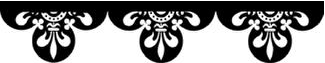

# Conclusión

En este Notebook se visitaron varios ejemplos en los que se demuestra como Dask optimiza la gestión de datos y la ejecución de tareas computacionalmente intensivas, Permitiendo a los usuarios maximizar el rendimiento de sus recursos informáticos.


### Gracias